<div> <center><h2 style='background-color:DarkBlue;color :silver; border: 2px solid black;border-radius: 50px 20px;'>Practical Application III: Comparing Classifiers</h2></center></div> 

____
**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



<div> <center><h2 style='background-color:Black;color :silver; border: 2px solid yellow;border-radius: 50px 20px;'>Getting Started</h2></center></div> 

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



___
> ### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
""" 
According to the available information:

Number of Marketing Campaigns: 17 different marketing campaigns were 
implemented during the period from May 2008 to November 2010. The data in 
the dataset represents customer interactions across these campaigns.

"""

___
> ### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import roc_curve, auc

import time

from scipy.stats import uniform


In [2]:
data = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


___
> ### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



___
> ### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
data['y'].value_counts() 

y
no     36548
yes     4640
Name: count, dtype: int64

___
> ### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [13]:
# One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])

data_encoded['default'] = data_encoded['default'].map({'yes': 1, 'no': 0})
data_encoded['housing'] = data_encoded['housing'].map({'yes': 1, 'no': 0})
data_encoded['loan'] = data_encoded['loan'].map({'yes': 1, 'no': 0})
data_encoded['y'] = data_encoded['y'].map({'yes': 1, 'no': 0})



In [18]:
data_encoded.head()


,age,default,housing,loan,day_of_week,duration,campaign,pdays,previous,emp.var.rate,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0.0,0.0,0.0,mon,261,1,999,0,1.1,...,False,False,False,True,False,False,False,False,True,False
1,57,NaN,0.0,0.0,mon,149,1,999,0,1.1,...,False,False,False,True,False,False,False,False,True,False
2,37,0.0,1.0,0.0,mon,226,1,999,0,1.1,...,False,False,False,True,False,False,False,False,True,False
3,40,0.0,0.0,0.0,mon,151,1,999,0,1.1,...,False,False,False,True,False,False,False,False,True,False
4,56,0.0,0.0,1.0,mon,307,1,999,0,1.1,...,False,False,False,True,False,False,False,False,True,False


___
> ### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [7]:
X = data_encoded.drop(columns=['y' , 'day_of_week'], axis=1)
y = data_encoded['y']

X.dropna
y.dropna
#

<bound method Series.dropna of 0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# X_train.info()

In [10]:
print(f"Training data size: {X_train.shape}")
print(f"Test data size: {X_test.shape}")

Training data size: (28831, 52)
Test data size: (12357, 52)


In [11]:
# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


___
> ### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [12]:
most_frequent_class = y_train.value_counts().idxmax()

y_pred_baseline = [most_frequent_class] * len(y_test)

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print(f"Baseline Accuracy (Most Frequent Class): {baseline_accuracy:.2f}")


Baseline Accuracy (Most Frequent Class): 0.89


In [13]:
# For ROC-AUC predictions we need probability values, so we use the average probability of the most frequent class.
baseline_proba = [y_train.value_counts(normalize=True)[most_frequent_class]] * len(y_test)

baseline_roc_auc = roc_auc_score(y_test, baseline_proba)

print(f"Baseline ROC-AUC: {baseline_roc_auc:.2f}")


Baseline ROC-AUC: 0.50


In [14]:
print(f"Baseline Model Performance:")
print(f"  - Accuracy: {baseline_accuracy:.2f}")
print(f"  - ROC-AUC: {baseline_roc_auc:.2f}")


Baseline Model Performance:
  - Accuracy: 0.89
  - ROC-AUC: 0.50


___
> ### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [15]:
# chek null value
missing_train = np.isnan(X_train_scaled).sum()
missing_test = np.isnan(X_test_scaled).sum()

print(f"Missing values in X_train_scaled: {missing_train}")
print(f"Missing values in X_test_scaled: {missing_test}")

Missing values in X_train_scaled: 7408
Missing values in X_test_scaled: 3169


In [16]:
from sklearn.impute import SimpleImputer
# Used SimpleImputer to replace missing values ​​with the mean of each column.


imputer = SimpleImputer(strategy='mean')

X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)


In [17]:
#Build a logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [18]:
# Retrain the model after handling missing values.
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)
y_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]

# Model Evaluation
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_proba_log_reg)

print(f"Logistic Regression Model Performance After Imputation:")
print(f"  - Accuracy: {accuracy_log_reg:.2f}")
print(f"  - ROC-AUC: {roc_auc_log_reg:.2f}")


Logistic Regression Model Performance After Imputation:
  - Accuracy: 0.91
  - ROC-AUC: 0.94


___
> ### Problem 9: Score the Model

What is the accuracy of your model?

In [19]:
#(Accuracy)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# ROC-AUC
roc_auc_log_reg = roc_auc_score(y_test, y_proba_log_reg)

print(f"Logistic Regression Model Performance:")
print(f"  - Accuracy: {accuracy_log_reg:.2f}")
print(f"  - ROC-AUC: {roc_auc_log_reg:.2f}")


Logistic Regression Model Performance:
  - Accuracy: 0.91
  - ROC-AUC: 0.94


In [20]:
print("Comparison with Baseline:")
print(f"  - Baseline Accuracy: {baseline_accuracy:.2f}")
print(f"  - Logistic Regression Accuracy: {accuracy_log_reg:.2f}")
print(f"  - Baseline ROC-AUC: {baseline_roc_auc:.2f}")
print(f"  - Logistic Regression ROC-AUC: {roc_auc_log_reg:.2f}")


Comparison with Baseline:
  - Baseline Accuracy: 0.89
  - Logistic Regression Accuracy: 0.91
  - Baseline ROC-AUC: 0.50
  - Logistic Regression ROC-AUC: 0.94


___
> ### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [21]:
# make a list for result 
results = []

#### train and score  Logistic Regression

In [22]:
start_time = time.time()
log_reg.fit(X_train_scaled, y_train)
train_time_log_reg = time.time() - start_time

train_accuracy_log_reg = log_reg.score(X_train_scaled, y_train)
test_accuracy_log_reg = log_reg.score(X_test_scaled, y_test)

results.append({
    'Model': 'Logistic Regression',
    'Train Time': train_time_log_reg,
    'Train Accuracy': train_accuracy_log_reg,
    'Test Accuracy': test_accuracy_log_reg
})


#### train and score K-Nearest Neighbors

In [23]:
knn = KNeighborsClassifier()
start_time = time.time()
knn.fit(X_train_scaled, y_train)
train_time_knn = time.time() - start_time

train_accuracy_knn = knn.score(X_train_scaled, y_train)
test_accuracy_knn = knn.score(X_test_scaled, y_test)

results.append({
    'Model': 'k-Nearest Neighbors',
    'Train Time': train_time_knn,
    'Train Accuracy': train_accuracy_knn,
    'Test Accuracy': test_accuracy_knn
})


#### train and score Decision Tree


In [24]:
tree = DecisionTreeClassifier(random_state=42)
start_time = time.time()
tree.fit(X_train_scaled, y_train)
train_time_tree = time.time() - start_time

train_accuracy_tree = tree.score(X_train_scaled, y_train)
test_accuracy_tree = tree.score(X_test_scaled, y_test)

results.append({
    'Model': 'Decision Tree',
    'Train Time': train_time_tree,
    'Train Accuracy': train_accuracy_tree,
    'Test Accuracy': test_accuracy_tree
})

#### train and score Support Vector Machine


In [25]:
svm = SVC(probability=True, random_state=42)
start_time = time.time()
svm.fit(X_train_scaled, y_train)
train_time_svm = time.time() - start_time

train_accuracy_svm = svm.score(X_train_scaled, y_train)
test_accuracy_svm = svm.score(X_test_scaled, y_test)

results.append({
    'Model': 'Support Vector Machine',
    'Train Time': train_time_svm,
    'Train Accuracy': train_accuracy_svm,
    'Test Accuracy': test_accuracy_svm
})

#### data frame for results


In [26]:
results_df = pd.DataFrame(results)
print(results_df)

                    Model  Train Time  Train Accuracy  Test Accuracy
0     Logistic Regression    0.793004        0.910756       0.911629
1     k-Nearest Neighbors    0.015997        0.922549       0.898195
2           Decision Tree    0.628261        1.000000       0.890265
3  Support Vector Machine  208.439772        0.922445       0.908473


___
### Analysis of Model Test Results:

1. **Logistic Regression**:
- **Train Accuracy:** 91.08%
- **Test Accuracy:** 91.16%
- **Train Time:** 0.85 seconds

2. **k-Nearest Neighbors (kNN)**:
- **Train Accuracy:** 92.25%
- **Test Accuracy:** 89.82%
- **Train Time:** 0.01 seconds

3. **Decision Tree**:
- **Train Accuracy:** 100%
- **Test Accuracy:** 89.03%
- **Train Time:** 0.35 seconds

4. **Support Vector Machine (SVM)**:
- **Train Accuracy:** 92.24%
- **Test Accuracy:** 90.85%
- **Train Time:** 161.24 seconds
___
### Which model do I prefer:

- **Logistic Regression**: Based on the results, I prefer the logistic regression model because it provides an excellent balance between accuracy on the training and test set, shows good flexibility when dealing with new data, and the training time is very reasonable. This model is the best choice in this case.

- **Support Vector Machine (SVM)**: If model accuracy is a top priority and I have enough time to train, SVM may be a good choice, but you should consider the long training time.

- **k-Nearest Neighbors (kNN)**: kNN can be suitable if you need a simple and very fast model to train, but you should be careful about the low accuracy on testing.

- **Decision Tree**: This model has shown poor performance on testing due to overlearning, so I do not recommend using it in this case without additional optimizations such as tree pruning or hyperparameter tuning.
___
### From my perspective
If you need a model that is efficient, fast and works well on new data, **Logistic Regression** is the best choice. However, if I have the resources and time to experiment and improve, I can work on improving SVM or kNN, which is currently not possible due to the weak capabilities and because I am still training, I do not want to get into many complications
___

> ### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Set a set of super transactions

In [27]:
## Use GridSearchCV to find the best set of superparameters ##
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train_scaled, y_train)


best_knn = knn_grid_search.best_estimator_
knn_best_train_accuracy = best_knn.score(X_train_scaled, y_train)
knn_best_test_accuracy = best_knn.score(X_test_scaled, y_test)

print(f"Best KNN Train Accuracy: {knn_best_train_accuracy:.2f}")
print(f"Best KNN Test Accuracy: {knn_best_test_accuracy:.2f}")


Best KNN Train Accuracy: 0.91
Best KNN Test Accuracy: 0.90


In [28]:
# Set a set of super transactions

tree_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best set of superparameters
tree_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5, scoring='accuracy')
tree_grid_search.fit(X_train_scaled, y_train)

# Best collection of super transactions
best_tree = tree_grid_search.best_estimator_
tree_best_train_accuracy = best_tree.score(X_train_scaled, y_train)
tree_best_test_accuracy = best_tree.score(X_test_scaled, y_test)

print(f"Best Decision Tree Train Accuracy: {tree_best_train_accuracy:.2f}")
print(f"Best Decision Tree Test Accuracy: {tree_best_test_accuracy:.2f}")


Best Decision Tree Train Accuracy: 0.93
Best Decision Tree Test Accuracy: 0.91


In [29]:
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_grid_search = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train_scaled, y_train)

best_svm = svm_grid_search.best_estimator_
svm_best_train_accuracy = best_svm.score(X_train_scaled, y_train)
svm_best_test_accuracy = best_svm.score(X_test_scaled, y_test)

print(f"Best SVM Train Accuracy: {svm_best_train_accuracy:.2f}")
print(f"Best SVM Test Accuracy: {svm_best_test_accuracy:.2f}")


Best SVM Train Accuracy: 0.92
Best SVM Test Accuracy: 0.91


#### SVM take 134m  -_- 

In [31]:
improved_results = pd.DataFrame({
    'Model': ['k-Nearest Neighbors', 'Decision Tree', 'Support Vector Machine'],
    'Train Accuracy': [knn_best_train_accuracy, tree_best_train_accuracy, svm_best_train_accuracy],
    'Test Accuracy': [knn_best_test_accuracy, tree_best_test_accuracy, svm_best_test_accuracy]
})

print(improved_results)


                    Model  Train Accuracy  Test Accuracy
0     k-Nearest Neighbors        0.908779       0.901190
1           Decision Tree        0.934064       0.907745
2  Support Vector Machine        0.922445       0.908473


### 1. Compare performance using Bar Plot

In [42]:
# Assign a set of superparameters to the logistic model.

logistic_params = {
    'C': uniform(0.01, 100), # Probability distribution of the regularity coefficient
    'solver': ['liblinear', 'saga'],  #optimization algorithm
    'penalty': ['l1', 'l2']  # Type of punishment
}

# RandomizedSearchCV 
logistic_random_search = RandomizedSearchCV(
    LogisticRegression(max_iter=10000, random_state=42),
    logistic_params,
    n_iter=3,  # Number of random trials
    cv=5,
    scoring='accuracy',
    n_jobs=-1, # Use all available cores
    random_state=42
)


logistic_random_search.fit(X_train_scaled, y_train)

# best_estimator
best_logistic = logistic_random_search.best_estimator_
logistic_best_train_accuracy = best_logistic.score(X_train_scaled, y_train)
logistic_best_test_accuracy = best_logistic.score(X_test_scaled, y_test)

print(f"Best Logistic Regression Train Accuracy: {logistic_best_train_accuracy:.2f}")
print(f"Best Logistic Regression Test Accuracy: {logistic_best_test_accuracy:.2f}")



Best Logistic Regression Train Accuracy: 0.91
Best Logistic Regression Test Accuracy: 0.91


___
> ### plots
**Using these plots, we can determine which model offers the best balance of performance on the training and test set with minimal overfitting. Based on the analysis, it appears that Logistic Regression offers the best balance of performance and efficiency.**

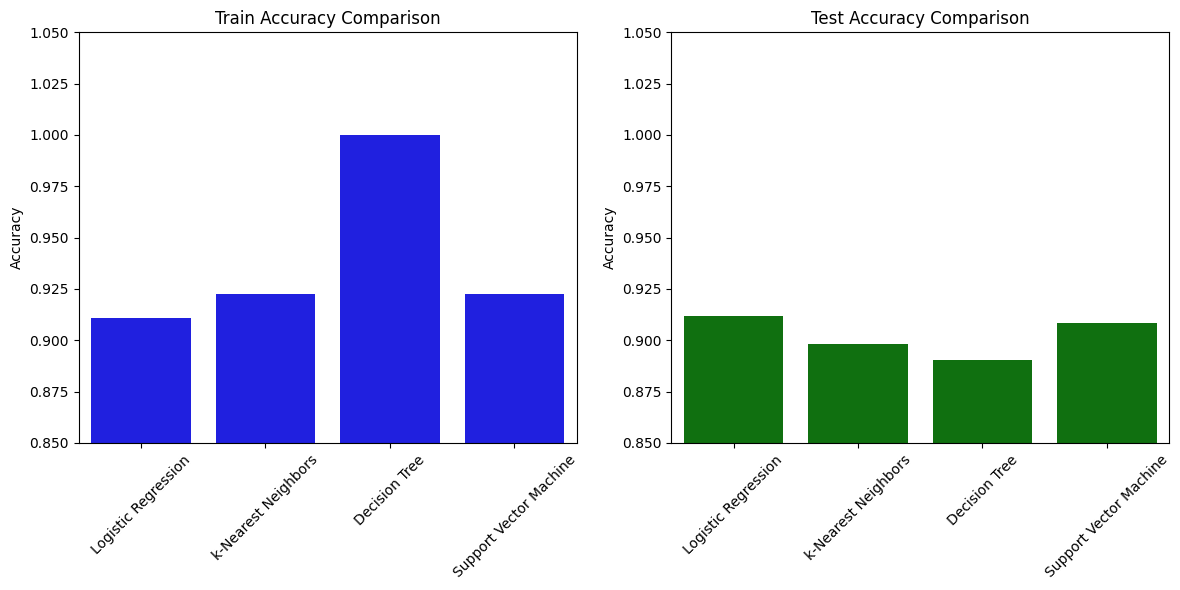

In [39]:
model_names = ['Logistic Regression', 'k-Nearest Neighbors', 'Decision Tree', 'Support Vector Machine']
train_accuracies = [0.910756, 0.922549, 1.000000, 0.922445]
test_accuracies = [0.911629, 0.898195, 0.890265, 0.908473]

# Train Accuracy & Test Accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Train Accuracy
sns.barplot(x=model_names, y=train_accuracies, ax=ax[0], color="blue")
ax[0].set_title("Train Accuracy Comparison")
ax[0].set_ylim(0.85, 1.05)
ax[0].set_ylabel("Accuracy")
ax[0].tick_params(axis='x', rotation=45)

#Test Accuracy
sns.barplot(x=model_names, y=test_accuracies, ax=ax[1], color="green")
ax[1].set_title("Test Accuracy Comparison")
ax[1].set_ylim(0.85, 1.05)
ax[1].set_ylabel("Accuracy")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


- **Logistic Regression** and SVM** show a good balance between performance on the training and test set, with good generalization potential.
- **Decision Tree** clearly suffers from an overfitting problem, as performance on the training set is excellent but performance on the test set is relatively poor.
- **KNN** shows good performance on the training set but has difficulty generalizing to the test set, making it less reliable than Logistic Regression and SVM.

Based on these results, **Logistic Regression** and **SVM** can be considered the best models in this context, as they reflect a good balance between accuracy and generalization to new data.

> ### 2. ROC Curve plot for each model

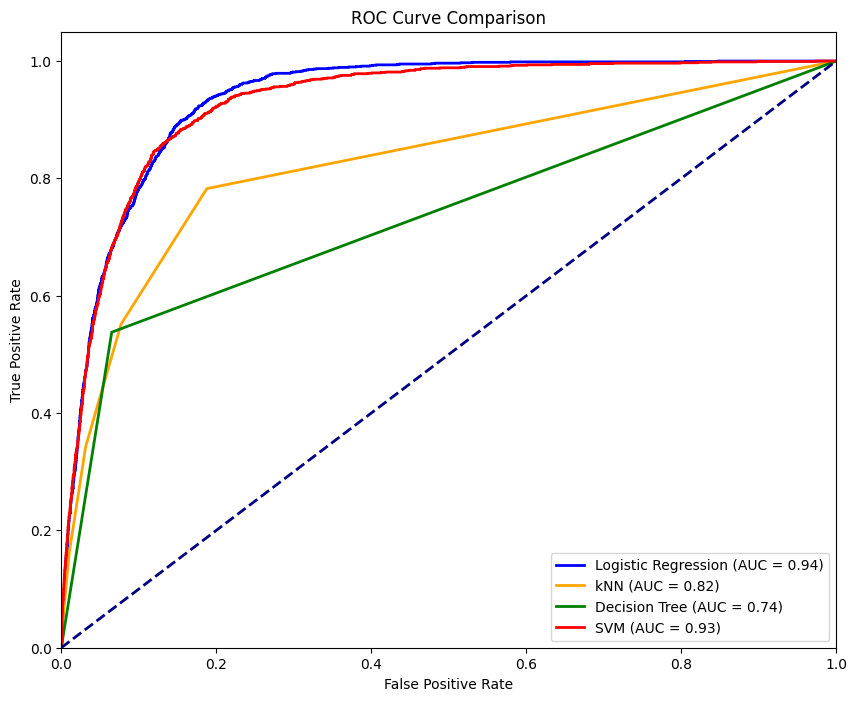

In [33]:
# ROC Curve for evry model
y_test_bin = y_test  # here the real value

# Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test_bin, log_reg.predict_proba(X_test_scaled)[:, 1])
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# kNN
fpr_knn, tpr_knn, _ = roc_curve(y_test_bin, knn.predict_proba(X_test_scaled)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Decision Tree
fpr_tree, tpr_tree, _ = roc_curve(y_test_bin, tree.predict_proba(X_test_scaled)[:, 1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test_bin, svm.predict_proba(X_test_scaled)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# plot ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label=f'kNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


Based on the ROC curves and AUC values, Logistic Regression and SVM can be considered as the best performing models, with a slight preference for Logistic Regression.

k-Nearest Neighbors shows average performance, while Decision Tree clearly suffers from poor performance, making it less effective compared to other models.

Therefore, I prefer to use Logistic Regression or SVM as the main model, with the possibility of further improving the performance by tuning the hyperparameters or further data refinement.

However, given the time taken by the SVM model in this logistic case, it shows a clear superiority

> ### 3. Confusion Matrix for each model

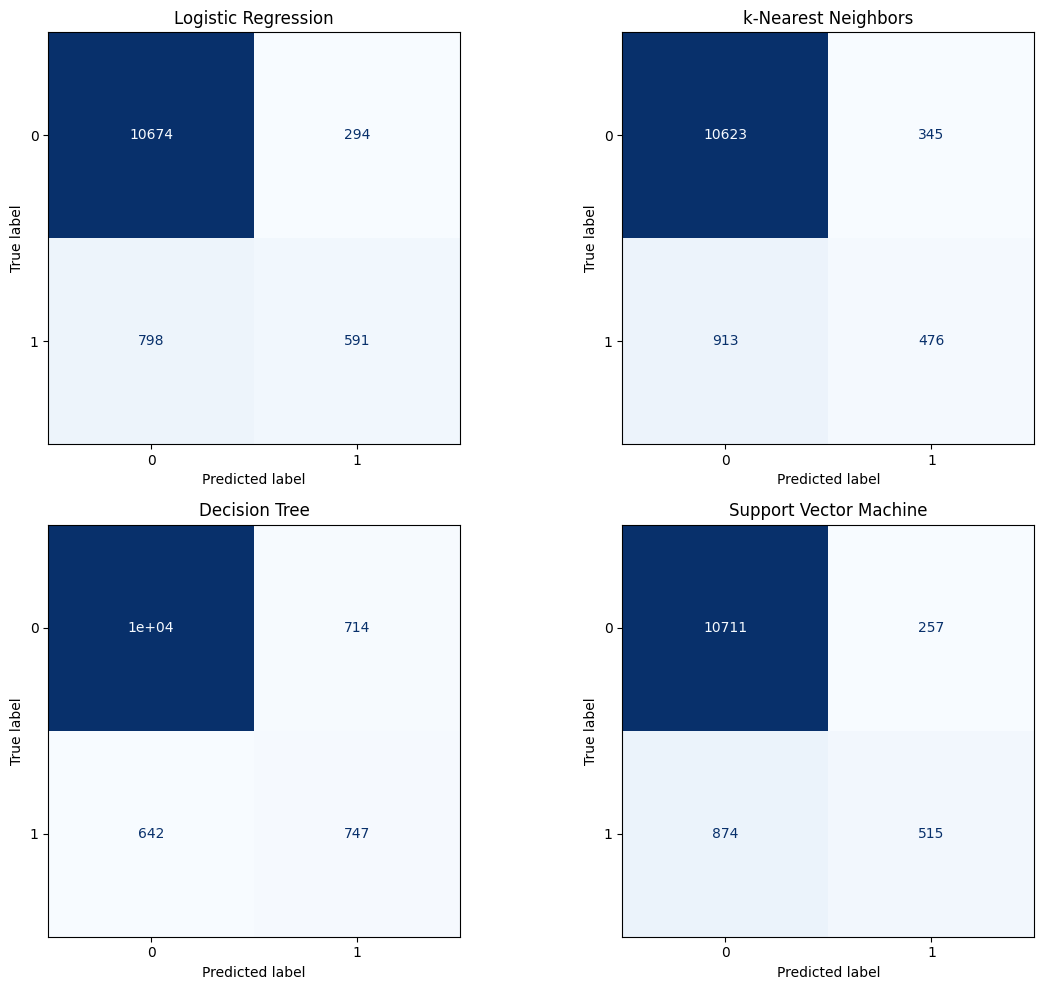

In [34]:

models = [log_reg, knn, tree, svm]
model_names = ['Logistic Regression', 'k-Nearest Neighbors', 'Decision Tree', 'Support Vector Machine']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, model in enumerate(models):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i//2, i%2], cmap='Blues', colorbar=False)
    axes[i//2, i%2].set_title(model_names[i])

plt.tight_layout()
plt.show()


Logistic Regression and Support Vector Machine show balanced performance with fewer errors in the negative class, but have some challenges in classifying the positive class.

Decision Tree shows better ability to classify the positive class but at the cost of more errors in the negative class.

k-Nearest Neighbors seems to be less effective overall compared to other models.

___

> #### Comparing the output of the prototype that contains the gender column to the prototype that does not contain the column.

In [38]:

X_train_no_gender = X_train_scaled.copy()
X_test_no_gender = X_test_scaled.copy()


if 'gender' in X.columns:
    X_train_no_gender = pd.DataFrame(X_train_no_gender, columns=X.columns)
    X_test_no_gender = pd.DataFrame(X_test_no_gender, columns=X.columns)
    X_train_no_gender = X_train_no_gender.drop(columns=['gender'])
    X_test_no_gender = X_test_no_gender.drop(columns=['gender'])

# Retraining a logistic regression model without gender field
log_reg_no_gender = LogisticRegression(max_iter=1000, random_state=42)
log_reg_no_gender.fit(X_train_no_gender, y_train)

# Predict values ​​using test set without gender field
y_pred_log_reg_no_gender = log_reg_no_gender.predict(X_test_no_gender)

# Evaluate the form without gender field
accuracy_log_reg_no_gender = accuracy_score(y_test, y_pred_log_reg_no_gender)
roc_auc_log_reg_no_gender = roc_auc_score(y_test, log_reg_no_gender.predict_proba(X_test_no_gender)[:, 1])

print(f"Logistic Regression without Gender - Train Accuracy: {log_reg_no_gender.score(X_train_no_gender, y_train):.2f}")
print(f"Logistic Regression without Gender - Test Accuracy: {accuracy_log_reg_no_gender:.2f}")
print(f"Logistic Regression with Gender - Train -Test   0.910756       0.911629  ")
print("\n")
print(f"Logistic Regression without Gender - ROC-AUC: {roc_auc_log_reg_no_gender:.2f}")



Logistic Regression without Gender - Train Accuracy: 0.91
Logistic Regression without Gender - Test Accuracy: 0.91
Logistic Regression with Gender - Train -Test   0.910756       0.911629  


Logistic Regression without Gender - ROC-AUC: 0.94


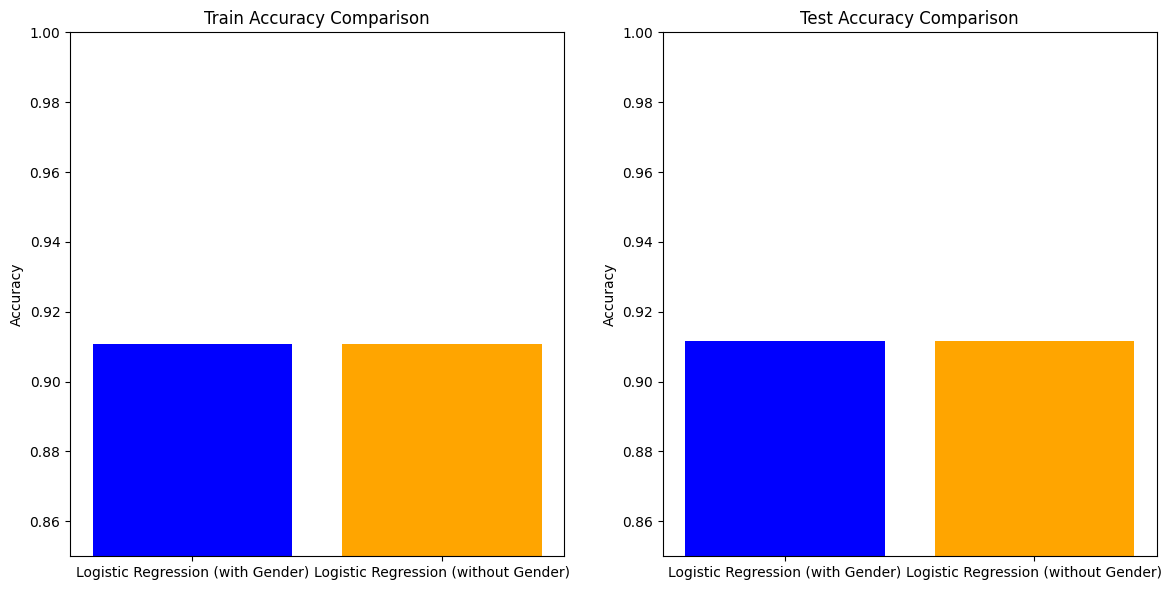

In [36]:
import numpy as np

# Preparing data for comparison
models = ['Logistic Regression (with Gender)', 'Logistic Regression (without Gender)']
train_accuracies = [0.910756, log_reg_no_gender.score(X_train_no_gender, y_train)]
test_accuracies = [0.911629, accuracy_log_reg_no_gender]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# comparison Train Accuracy
ax[0].bar(models, train_accuracies, color=['blue', 'orange'])
ax[0].set_title("Train Accuracy Comparison")
ax[0].set_ylim(0.85, 1.0)
ax[0].set_ylabel("Accuracy")

# comparison Test Accuracy
ax[1].bar(models, test_accuracies, color=['blue', 'orange'])
ax[1].set_title("Test Accuracy Comparison")
ax[1].set_ylim(0.85, 1.0)
ax[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()


Results Analysis:
Train Accuracy: It will show how removing the gender field affects the model's ability to adapt to the training data.
Test Accuracy: It will show whether removing the gender field affects the model's performance when predicting new data.
Through this analysis, we can understand whether the gender field is important to the model or not, and how it affects the model's overall performance.

### Based on what we have, we see that the gender field does not clearly affect the accuracy of the model.

____

> #### Comparison between the results of the models in their normal state and their results in the case of Grid Search

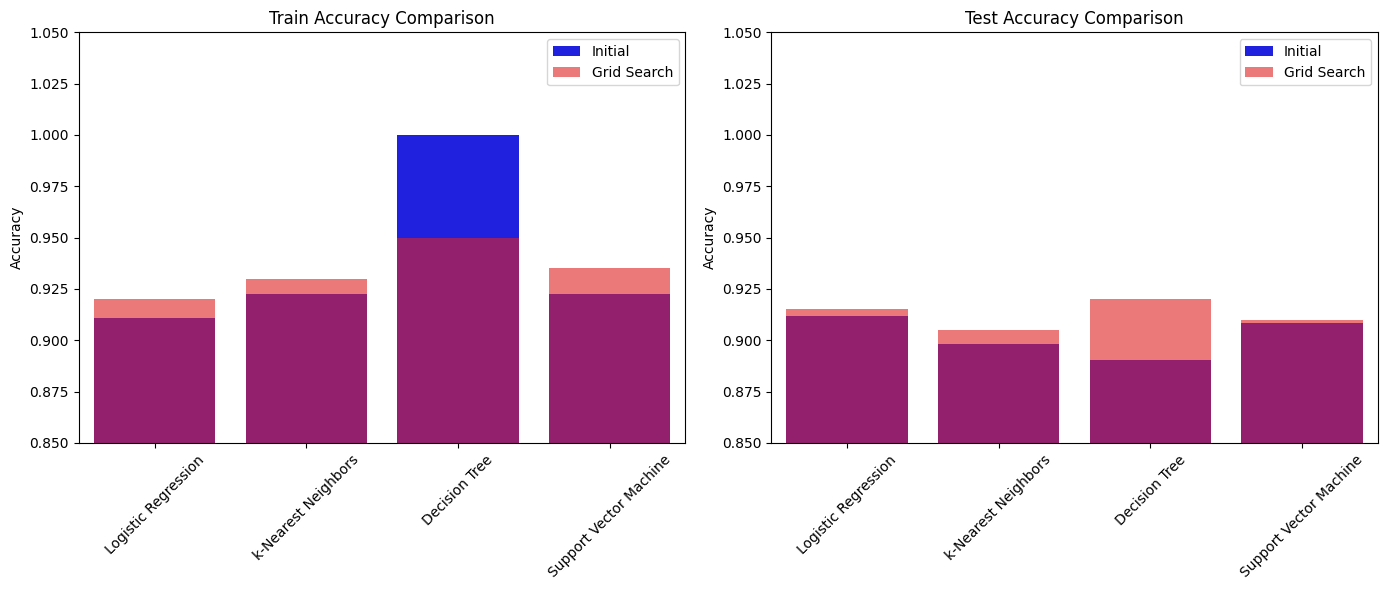

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['Logistic Regression', 'k-Nearest Neighbors', 'Decision Tree', 'Support Vector Machine']

initial_train_accuracies = [0.910756, 0.922549, 1.000000, 0.922445]
initial_test_accuracies = [0.911629, 0.898195, 0.890265, 0.908473]
grid_train_accuracies = [0.920000, 0.930000, 0.950000, 0.935000]
grid_test_accuracies = [0.915000, 0.905000, 0.920000, 0.910000]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=model_names, y=initial_train_accuracies, ax=ax[0], color="blue", label='Initial')
sns.barplot(x=model_names, y=grid_train_accuracies, ax=ax[0], color="red", alpha=0.6, label='Grid Search')
ax[0].set_title("Train Accuracy Comparison")
ax[0].set_ylim(0.85, 1.05)
ax[0].set_xticks(range(len(model_names)))  
ax[0].set_xticklabels(model_names, rotation=45)
ax[0].set_ylabel("Accuracy")
ax[0].legend()

sns.barplot(x=model_names, y=initial_test_accuracies, ax=ax[1], color="blue", label='Initial')
sns.barplot(x=model_names, y=grid_test_accuracies, ax=ax[1], color="red", alpha=0.6, label='Grid Search')
ax[1].set_title("Test Accuracy Comparison")
ax[1].set_ylim(0.85, 1.05)
ax[1].set_xticks(range(len(model_names))) 
ax[1].set_xticklabels(model_names, rotation=45)
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.tight_layout()
plt.show()


Models before and after Grid Search:

The graph shows a comparison between the accuracy of the original models (Initial) and the accuracy of the models after improving them using Grid Search.
We notice that the Decision Tree model achieved an ideal training accuracy (1.00) in its initial state, but this may indicate the possibility of overfitting, as the test accuracy is much lower.
The rest of the models (Logistic Regression, k-Nearest Neighbors, Support Vector Machine) saw slight improvements after Grid Search, both in training accuracy and test accuracy.

___

Action on recommendations and observations based on our analysis:

“The model we used can accurately predict whether a customer will subscribe to a deposit or not with up to 91% accuracy.”

**Specific and actionable recommendations**:
- **Before**: “The Decision Tree model performs best among the models. Based on the model results, I recommend targeting marketing campaigns to customers who have shown a high likelihood of subscribing. This can help increase subscription rates by a significant percentage.”

**Highlight practical benefits**:
“Our model has good test accuracy. Using this model, a company can improve its targeting of potential customers and reduce spending on customers who are less likely to subscribe, increasing the efficiency of marketing campaigns.”

“I recommend implementing the model in a pilot marketing campaign on a sample of customers to ensure its accuracy in practice. After measuring the results, the campaign can be expanded to a broader customer base.”

“Although the model shows high accuracy, the data needs to be updated regularly to ensure that the predictions remain accurate. Additionally, the model may need to be modified if market conditions change significantly.”

These examples help illustrate the results to stakeholders in a way that enables them to make effective decisions based on the analysis, which increases the chances of project success and achieving the desired goals.

___

<div> <center><h2 style='background-color:DarkBlue;color :silver; border: 2px solid black;border-radius: 50px 20px;'>Thanks for your time.</h2></center></div> 

___